# Introduction: 
### Cet ensemble de données est conçu pour aider les chercheurs et les data scientists à prédire le rendement des cultures en fonction des facteurs agricoles clés. Il contient des colonnes représentant la quantité d'engrais utilisée, la température et les nutriments du sol (azote, phosphore et potassium), ainsi que le rendement des cultures correspondant.

### Cet ensemble de données peut être utilisé pour des projets d'apprentissage automatique axés sur l'optimisation agricole, la prévision des rendements et la gestion des ressources. 

### Les données sont structurées et prêtes à l'analyse, ce qui les rend idéales pour l'entraînement de modèles de régression  ou l'analyse exploratoire des données.

## Problématique : Prévision du rendement des cultures à l'aide du sol et de la météo

## Importation des bibliothèques et du DataSet


In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pickle
import joblib
print("Bibliothèques importées")

Bibliothèques importées


In [233]:
df = pd.read_csv('dataset.csv')
print("Dataset importé")

Dataset importé


## Analyses Exploratoires 

### L'affichage des prémières lignes 

In [234]:
print(df.head())

   Fertilizer  temp     N     P     K  yeild
0        80.0  28.0  80.0  24.0  20.0   12.0
1        77.0  27.0  78.0  23.0  20.0   12.0
2        80.0  26.0  80.0  24.0  20.0   12.0
3        80.0  28.0  80.0  24.0  20.0   12.0
4        78.0  27.0  78.0  23.0  19.0   12.0


### Renomination des noms de colonnes 

In [235]:
df.rename(columns ={ 
    "Fertilizer" : " Engrais",
    "temp" : "Temperature",
    "N" : "Azote",
    "P" : "Phosphore",
    "K" : "Potassium",
    "yeild" : "Rendement"
}, inplace = True )

In [236]:
df

,Engrais,Temperature,Azote,Phosphore,Potassium,Rendement
0,80.000000,28.000000,80.000000,24.000000,20.000000,12.000000
1,77.000000,27.000000,78.000000,23.000000,20.000000,12.000000
2,80.000000,26.000000,80.000000,24.000000,20.000000,12.000000
3,80.000000,28.000000,80.000000,24.000000,20.000000,12.000000
4,78.000000,27.000000,78.000000,23.000000,19.000000,12.000000
...,...,...,...,...,...,...
2591,78.942684,27.014634,76.838312,23.087606,20.044206,10.348503
2592,79.077362,27.153127,76.927657,23.068234,20.155436,10.528122
2593,78.986271,28.108948,77.164352,22.863654,20.989871,10.564205
2594,78.894767,28.141344,76.925149,23.071553,20.873662,10.442511


In [237]:
df.shape

(2596, 6)

In [238]:
df.describe()

,Engrais,Temperature,Azote,Phosphore,Potassium,Rendement
count,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000
mean,66.487433,33.848237,69.522900,20.708194,17.806268,8.533832
std,9.747669,5.371279,6.802806,1.973419,1.940037,1.938789
min,49.751436,23.771310,58.839466,17.723223,14.704883,5.150745
25%,59.865423,28.000000,64.834635,18.988224,15.975932,6.929404
50%,65.011969,36.965121,69.894076,20.889579,18.061975,8.501720
75%,76.943112,38.928914,76.845919,22.125618,19.133858,10.045179
max,80.223893,40.272480,80.218705,25.162178,22.064666,12.337651


In [239]:
# Vérification des valeurs manquantes
df.isnull().sum()

 Engrais       0
Temperature    0
Azote          0
Phosphore      0
Potassium      0
Rendement      0
dtype: int64

In [240]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0    Engrais     2596 non-null   float64
 1   Temperature  2596 non-null   float64
 2   Azote        2596 non-null   float64
 3   Phosphore    2596 non-null   float64
 4   Potassium    2596 non-null   float64
 5   Rendement    2596 non-null   float64
dtypes: float64(6)
memory usage: 121.8 KB
None


## Vérification de la corrélations

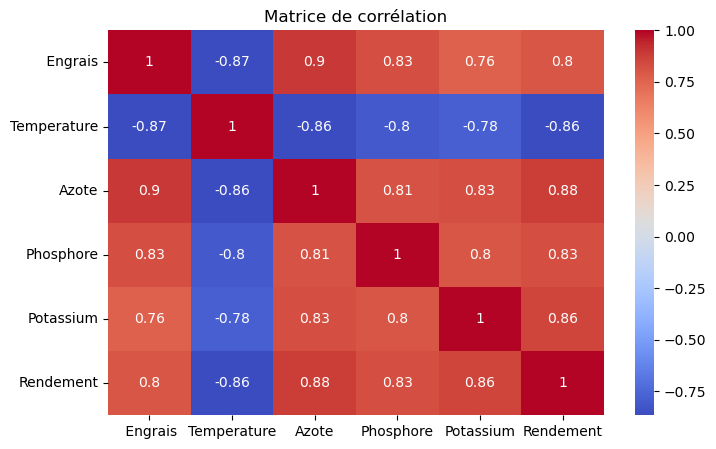

In [241]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.savefig('Matrice_corrélation', dpi=300, bbox_inches ='tight')
plt.show()

## Distribution du rendement

#### 1. Entre l'engrais(Fertilizer) et l'azote(N)  
Nous remarquons une très forte corrélation entre l'engrais et l'azote donc plus il y'a d'engrais 
plus il y'a d'azote.
#### 2. Entre l'engrais et le phosphore(P)
Nous remarquons une bonne corrélation positive entre l'engrais et le phosphore donc plus il y'a d'engrais
plus il y'a du phosphore
#### 3. Entre l'engrais et le rendement(yeild)
Il y'a une bonne corrélation positive entre ces deux variables ce qui veut dire que plus
il y'a de l'engrais plus il il y'a du rendement 
#### 4. Entre la température et le rendement 
Il y'a une une forte corrélation négative entre la température et le rendement ce qui veut dire
que plus la tempéreture est élevée moins il y'a de rendement.
#### 5. Entre le rendement et les composantes N, P, K
Le rendement est fortement dépendant de ses tois composantes et les liaisons sont respectivement de 0.88, 0.83 et de 0.86
#### 6. Entre la température et les composantes N, P, K
Les corrélations entre la température et les composantes du sol sont négatives donc l'augmentation de la température fait baissé le taux de nutriments dans le sol.

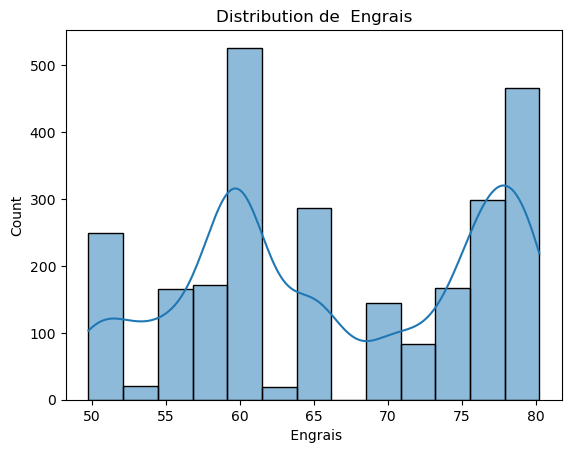

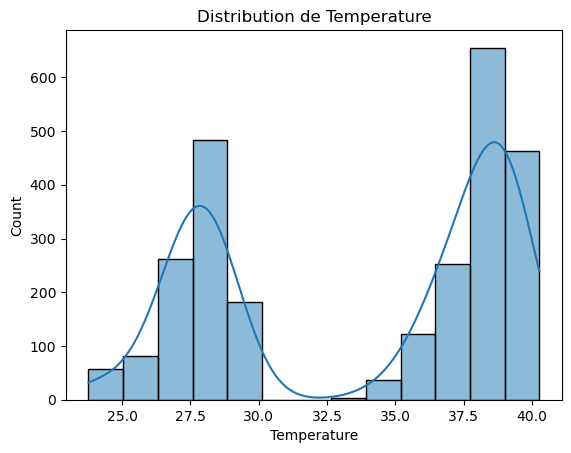

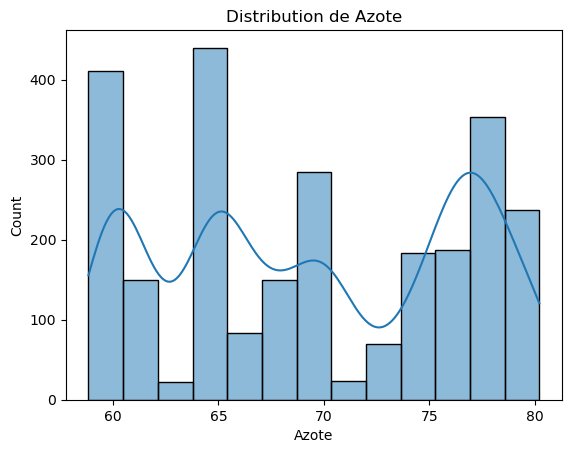

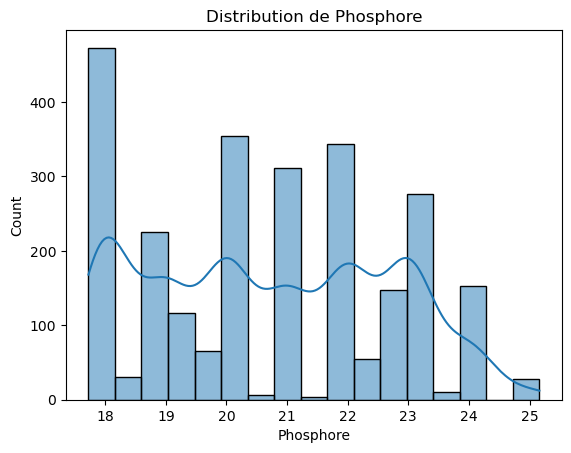

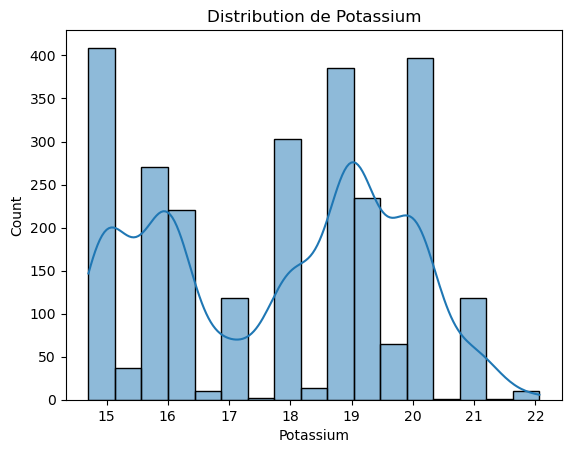

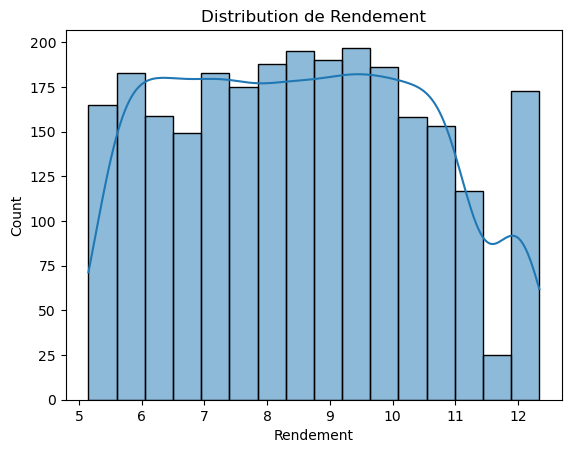

In [242]:
for col in df.select_dtypes(include='number').columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()



## Préparation des données

In [243]:
# Séparation des features et de la target
X = df.drop('Rendement', axis=1)
y = df['Rendement']

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [244]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

### 1. Model Random Forest

In [245]:
def random_forest_prediction(X_train, X_test, y_train, y_test):
    rf_model = RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        max_depth=10,
        min_samples_split=5
    )
    
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    
    return rf_model, y_pred

rf_model, y_pred_rf = random_forest_prediction(X_train, X_test, y_train, y_test)

### 2. Model gradient boosting

In [246]:
def gradient_boosting_prediction(X_train, X_test, y_train, y_test):
    gb_model = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )
    
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    
    return gb_model, y_pred

gb_model, y_pred_gb = gradient_boosting_prediction(X_train, X_test, y_train, y_test)

### 3. Regression linéaire

In [247]:
def linear_regression_prediction(X_train, X_test, y_train, y_test):
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    
    return lr_model, y_pred

lr_model, y_pred_lr = linear_regression_prediction(X_train, X_test, y_train, y_test)

### 4. Evaluation des modèles 

In [248]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n=== {model_name} ===")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}

# Évaluation des différents modèles
results = {}
results['Random Forest'] = evaluate_model(y_test, y_pred_rf, 'Random Forest')
results['Gradient Boosting'] = evaluate_model(y_test, y_pred_gb, 'Gradient Boosting')
results['Linear Regression'] = evaluate_model(y_test, y_pred_lr, 'Linear Regression')


=== Random Forest ===
MAE: 0.1247
MSE: 0.0372
RMSE: 0.1929
R²: 0.9901

=== Gradient Boosting ===
MAE: 0.2008
MSE: 0.0786
RMSE: 0.2803
R²: 0.9791

=== Linear Regression ===
MAE: 0.5791
MSE: 0.5162
RMSE: 0.7185
R²: 0.8626


### 5. Visualisation du modèle Random forest

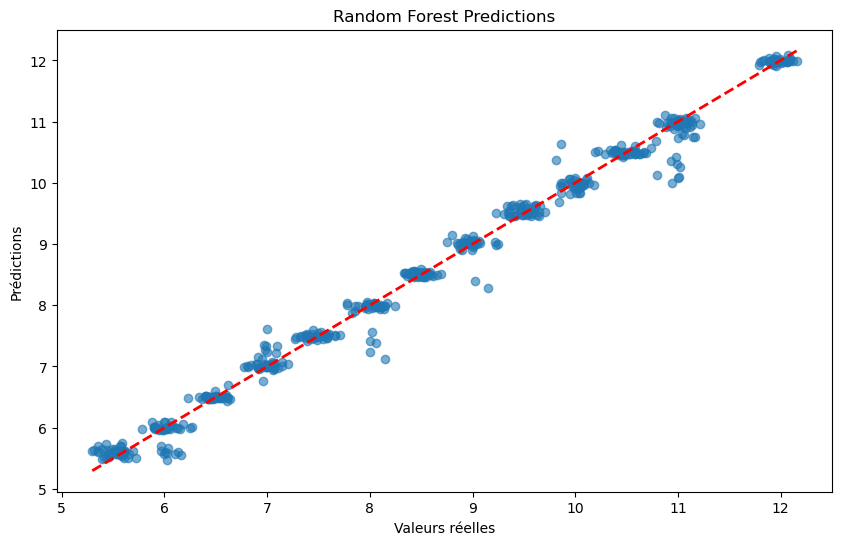

In [249]:
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Prédictions')
    plt.title(title)
    plt.show()

# Visualiser les prédictions du meilleur modèle
plot_predictions(y_test, y_pred_rf, 'Random Forest Predictions')

### Exemple d'utilisation 

In [251]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# 1. Créer et entraîner le scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Créer et entraîner le modèle
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 3. Définir la fonction de prédiction
def predict_rendement(Engrais, temperature, Azote, Phosphore, Potassium, model=rf_model, scaler=scaler):
    """
    Prédit le rendement basé sur les paramètres d'entrée
    """
    import pandas as pd
    # Créer un DataFrame avec les colonnes attendues
    input_data = pd.DataFrame([{
        "Engrais": Engrais,
        "temperature": temperature,
        "Azote": Azote,
        "Phosphore": Phosphore,
        "Potassium": Potassium
    }])

    # Appliquer le scaler
    input_scaled = scaler.transform(input_data.values)

    # Faire la prédiction
    prediction = model.predict(input_scaled)
    return prediction[0]

#Exemple d’utilisation :
predict_rendement(Engrais=120, temperature=25, Azote=50, Phosphore=30, Potassium=20)


8.17278140086737

### Visualisation de l'importance des variables dans la prédiction du rendement

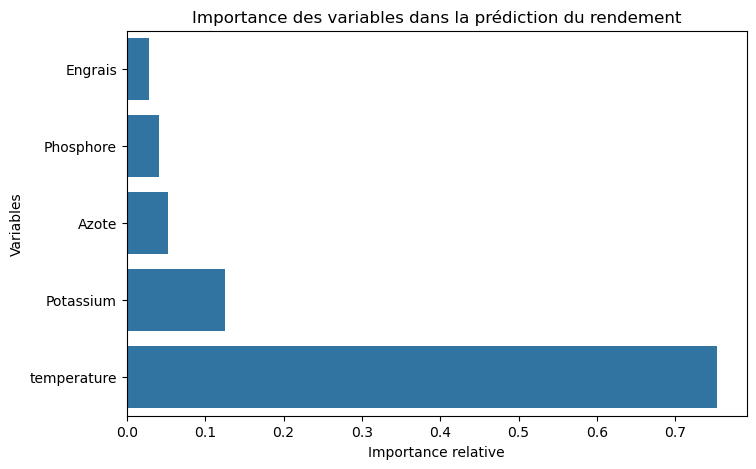

In [252]:
# 1. Récupérer l’importance des variables
importances = rf_model.feature_importances_

# 2. Mettre en DataFrame
df_importances = pd.DataFrame({
    "Variable": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=True)

# 3. Visualisation avec seaborn
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Variable", data=df_importances, orient="h")
plt.title("Importance des variables dans la prédiction du rendement")
plt.xlabel("Importance relative")
plt.ylabel("Variables")
plt.show()


### Réalisation de script

In [253]:
def save_model(model, scaler, filename='rendement_prediction_model.pkl'):
    model_data = {
        'model': model,
        'scaler': scaler,
        'feature_names': ['Engrais', 'Temperature', 'Azote', 'Phosphore', 'Potassium']
    }
    joblib.dump(model_data, filename)
    print(f"✅ Modèle sauvegardé sous {filename}")

def load_model(filename='rendement_prediction_model.pkl'):
    model_data = joblib.load(filename)
    print(f"📂 Modèle chargé depuis {filename}")
    return model_data

# Sauvegarder le modèle
save_model(rf_model, scaler)

# Charger le modèle
loaded_data = load_model()
loaded_model = loaded_data['model']
loaded_scaler = loaded_data['scaler']
loaded_features = loaded_data['feature_names']

# Exemple de prédiction avec le modèle chargé

def predict_with_loaded(Engrais, Temperature, Azote, Phosphore, Potassium, model=loaded_model, scaler=loaded_scaler, features=loaded_features):
    input_data = pd.DataFrame([[Engrais, Temperature, Azote, Phosphore, Potassium]], columns=features)
    input_scaled = scaler.transform(input_data.values)
    prediction = model.predict(input_scaled)
    return prediction[0]

print("🌱 Prédiction :", predict_with_loaded(120, 25, 50, 30, 20))

✅ Modèle sauvegardé sous rendement_prediction_model.pkl
📂 Modèle chargé depuis rendement_prediction_model.pkl
🌱 Prédiction : 8.17278140086737


## Conclusion 

- Le modèle **Random Forest** surpasse la régression linéaire en performance (R² plus élevé, RMSE plus faible).
- L'**importance des variables** indique que la **température** est le facteur dominant, suivie de **Potassium**, puis **Azote** et **Phosphore**.

Ce projet a permis de démontrer l’importance de l’exploitation des données agricoles dans l’optimisation de la production. À partir d’un jeu de données intégrant des variables clés telles que l’apport en engrais, la température et la composition du sol (azote, phosphore et potassium), nous avons pu appliquer différentes techniques d’apprentissage automatique afin de prédire le rendement des cultures.

L’analyse exploratoire a confirmé la pertinence de ces variables en tant que facteurs explicatifs de la productivité. L’expérimentation de plusieurs modèles de régression, notamment la régression linéaire, le Random Forest et le Gradient Boosting, a mis en évidence la supériorité des méthodes d’ensemble par rapport aux approches linéaires classiques, grâce à leur meilleure capacité de généralisation et leur robustesse face aux données bruitées.

Ces résultats confirment l’apport significatif des approches basées sur l’intelligence artificielle dans le domaine agricole. En automatisant la prévision des rendements, elles constituent un outil stratégique pour soutenir la prise de décision des agriculteurs, optimiser l’usage des ressources (engrais, eau, énergie) et contribuer à une agriculture durable.

Cependant, ce travail présente certaines limites, notamment la taille restreinte et la spécificité du jeu de données utilisé. Pour accroître la fiabilité des prédictions, il serait pertinent d’élargir la base de données à des contextes pédoclimatiques plus variés, d’intégrer d’autres facteurs déterminants (pluviométrie, humidité du sol, variétés de semences) et d’explorer des modèles plus avancés tels que les réseaux de neurones profonds.

En perspective, l’intégration de ces approches prédictives dans des systèmes décisionnels intelligents pourrait offrir aux exploitants agricoles un outil opérationnel d’aide à la planification, contribuant ainsi à relever les défis liés à la sécurité alimentaire et au changement climatique.